In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
import os

In [10]:
os.listdir()

['.ipynb_checkpoints',
 'motoG60.csv',
 'oppoA53.csv',
 'realme_8i.csv',
 'realme_C11.csv',
 'realme_Narzo.csv',
 'ReviewRating1.ipynb',
 'ReviewRating2.ipynb',
 'ReviewRating3.ipynb',
 'ReviewRating4.ipynb',
 'ReviewRating5.ipynb',
 'ReviewRating6.ipynb',
 'ReviewsRatingPrediction.ipynb',
 'samsungF22.csv']

In [11]:
df1 = pd.read_csv("motoG60.csv",index_col='index')

In [12]:
df1.tail()

,ratings,reviews
index,,
6957,5,Really good
6958,5,"Add free phone ,near stock Android experience ..."
6959,5,Nice phone
6960,5,Nice product.
6961,5,Right choice


In [13]:
df1.shape

(6961, 2)

In [14]:
df2 = pd.read_csv("oppoA53.csv",index_col='index')

In [15]:
df2.tail()

,ratings,reviews
index,,
4049,5,"Nice delivery 😊, nice phone"
4050,5,GOOD
4051,5,Good prodect
4052,5,Nyc product... For allrounder..and fast delive...
4053,5,Value for money


In [16]:
df2.shape

(4053, 2)

In [17]:
df3 = pd.read_csv("realme_8i.csv",index_col='index')

In [18]:
df3.head()

,ratings,reviews
index,,
1,1,Pls don't go for it. It has no silent call rec...
2,1,Very slow charging.
3,1,Many problems I face with this phone\n1.camera...
4,1,There is frequent screen blackout issue during...
5,1,Realme 8i model very worst proximity sensor no...


In [19]:
df3.shape

(2396, 2)

In [20]:
df4 = pd.read_csv("realme_C11.csv",index_col='index')

In [21]:
df4.head()

,ratings,reviews
index,,
1,1,Worst experience with this .......I hate flipk...
2,1,"I've bought this phone for my mom, some featur..."
3,1,Phone hanging problem and very slow performanc...
4,1,Waste of money we used only one week display c...
5,1,Worst product no replacement pls don't buy thi...


In [22]:
df4.shape

(5810, 2)

In [23]:
df5 = pd.read_csv("realme_Narzo.csv",index_col='index')

In [24]:
df5.head()

,ratings,reviews
index,,
1,1,Utterly disappointed...I was excited by seeing...
2,1,Display quality is very bad\nThis mobile is di...
3,1,This phone camera is not a good quality 😔😔
4,1,"The worst product narzo could make, overheatin..."
5,1,I'm really disappointed with camera performanc...


In [25]:
df5.shape

(2352, 2)

In [26]:
df6 = pd.read_csv("samsungF22.csv",index_col='index')

In [27]:
df6.head()

,ratings,reviews
index,,
1,1,Samsung f22 is not good work my fone not work ...
2,1,Camera quality is not good enough at this this...
3,1,Always is good but in This mobile have no Secu...
4,1,Wrost product.chaina product is so much better...
5,1,Average camera quality\nBattery performance is...


In [28]:
df6.shape

(3552, 2)

In [29]:
df=pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [30]:
df.shape

(25124, 2)

we now have 25124 reviews and ratings

In [31]:
df.index=(range(1,df.shape[0]+1))

In [32]:
df.head()

,ratings,reviews
1,1,I ( Aashish Nirmal Jain) have ordered moto g60...
2,1,Mostly camera is performance low and its hangi...
3,1,Camera clarity is very very worst it is like n...
4,1,Camera in low light is not good ...it gives 10...
5,1,Motorola G-60 Does Not Provide any Basic Defau...


In [33]:
df.columns

Index(['ratings', 'reviews'], dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25124 entries, 1 to 25124
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ratings  25124 non-null  int64 
 1   reviews  25124 non-null  object
dtypes: int64(1), object(1)
memory usage: 392.7+ KB


there are no missing values in the data

## checking for duplicate values

In [35]:
df[df.duplicated()]

,ratings,reviews
97,1,Worst camera
180,1,Camera quality is very bad
268,1,Worst phone
269,1,Waste of money
294,1,Camera quality is very bad
...,...,...
25114,5,Very good product
25116,5,Good
25117,5,Good
25121,5,Best phone


there are 9153 duplicate rows, so will drop the duplicate rows

In [36]:
sum(df.drop_duplicates()['reviews']=='Good')

5

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25124 entries, 1 to 25124
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ratings  25124 non-null  int64 
 1   reviews  25124 non-null  object
dtypes: int64(1), object(1)
memory usage: 392.7+ KB


In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 1 to 25124
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ratings  15971 non-null  int64 
 1   reviews  15971 non-null  object
dtypes: int64(1), object(1)
memory usage: 374.3+ KB


## ratings

In [40]:
df['ratings'].value_counts()

5    8331
4    3470
1    1853
3    1607
2     710
Name: ratings, dtype: int64

<AxesSubplot:xlabel='ratings', ylabel='count'>

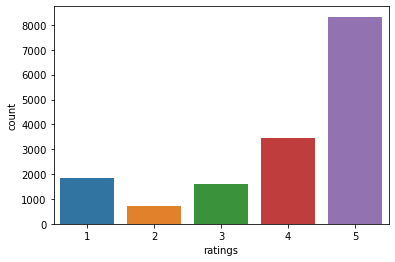

In [41]:
sns.countplot(df['ratings'])

## checking for spaces in reviews

In [42]:
df[df['reviews'].str.isspace()]

,ratings,reviews


In [43]:
df['reviews'].str.isspace().sum()

0

In [44]:
d = {'col1': [1, 'xyz'], 'col2': [3, 4]}
df1 = pd.DataFrame(data=d)

In [45]:
df1

,col1,col2
0,1,3
1,xyz,4


In [46]:
def retNoStr(x):
    if type(x)!=str:
        return True
    else:
        return False
    

In [47]:
def retNoStr(x):
    print(type(x))
    

In [48]:
df1['col1'].apply(retNoStr)

<class 'int'>
<class 'str'>


0    None
1    None
Name: col1, dtype: object

In [49]:
sum(df['reviews'].apply(retNoStr))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [50]:
df['reviews'].str.isspace().sum()

0

Now no null values and empty spaces

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

In [60]:
cv1 = CountVectorizer()
matrix=cv1.fit_transform(df[df['ratings']==1]['reviews'])
matrix

<1853x2629 sparse matrix of type '<class 'numpy.int64'>'
	with 23653 stored elements in Compressed Sparse Row format>

In [61]:
freqs = zip(cv1.get_feature_names(), matrix.sum(axis=0).tolist()[0])  
freqs

In [68]:
print("Top 20 words used for ratings 1.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for ratings 1.
[]


In [67]:
matrix= cv1.fit_transform(df[df['ratings']==2]['reviews'])
freqs = zip(cv1.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for ratings 2")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for ratings 2
[('is', 477), ('not', 409), ('camera', 278), ('good', 222), ('very', 211), ('the', 199), ('phone', 194), ('it', 181), ('quality', 160), ('and', 151), ('this', 149), ('to', 132), ('bad', 110), ('battery', 110), ('in', 110), ('of', 109), ('mobile', 102), ('but', 93), ('for', 88), ('poor', 80)]


In [66]:
matrix= cv1.fit_transform(df[df['ratings']==3]['reviews'])
freqs = zip(cv1.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for ratings 3")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for ratings 3
[('is', 1240), ('good', 855), ('not', 714), ('camera', 685), ('phone', 455), ('it', 451), ('and', 409), ('the', 401), ('but', 389), ('this', 340), ('for', 309), ('very', 309), ('to', 305), ('in', 300), ('quality', 300), ('battery', 266), ('mobile', 225), ('of', 213), ('display', 209), ('ok', 197)]


In [69]:
matrix= cv1.fit_transform(df[df['ratings']==4]['reviews'])
freqs = zip(cv1.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for ratings 4")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for ratings 4
[('good', 2328), ('is', 2246), ('phone', 1224), ('camera', 1011), ('it', 979), ('for', 944), ('this', 937), ('and', 931), ('the', 874), ('but', 726), ('in', 682), ('battery', 629), ('very', 608), ('not', 600), ('nice', 581), ('price', 552), ('mobile', 520), ('to', 520), ('product', 447), ('display', 424)]


In [70]:
matrix= cv1.fit_transform(df[df['ratings']==5]['reviews'])
freqs = zip(cv1.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for ratings 5")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for ratings 5
[('good', 3735), ('is', 3466), ('phone', 2891), ('and', 2116), ('this', 2101), ('very', 1978), ('it', 1945), ('for', 1906), ('nice', 1604), ('camera', 1562), ('the', 1557), ('in', 1440), ('mobile', 1394), ('best', 1347), ('product', 1242), ('price', 1128), ('battery', 1090), ('to', 877), ('awesome', 788), ('with', 771)]


In [72]:
from sklearn.model_selection import train_test_split

X = df['reviews']
y = df['ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [75]:
tfidf = TfidfVectorizer(stop_words='english')

In [76]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [77]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [78]:
len(X_train)

12776

In [79]:
X_train_tfidf

<12776x6324 sparse matrix of type '<class 'numpy.float64'>'
	with 85253 stored elements in Compressed Sparse Row format>

## Training the models

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


In [81]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [84]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [85]:
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

## Performance Evaluation

In [87]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [89]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

           1       0.68      0.53      0.60       383
           2       0.00      0.00      0.00       153
           3       0.40      0.01      0.01       305
           4       0.20      0.02      0.04       682
           5       0.58      0.98      0.73      1672

    accuracy                           0.58      3195
   macro avg       0.37      0.31      0.28      3195
weighted avg       0.47      0.58      0.46      3195



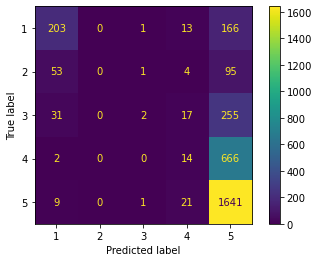

In [90]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

           1       0.60      0.70      0.64       383
           2       0.50      0.03      0.05       153
           3       0.36      0.17      0.23       305
           4       0.36      0.13      0.19       682
           5       0.66      0.92      0.77      1672

    accuracy                           0.61      3195
   macro avg       0.49      0.39      0.38      3195
weighted avg       0.55      0.61      0.54      3195



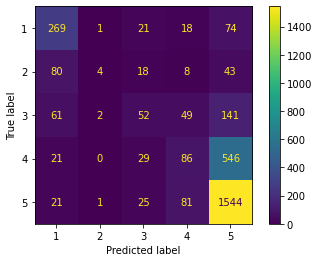

In [91]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

           1       0.57      0.68      0.62       383
           2       0.25      0.07      0.10       153
           3       0.28      0.17      0.21       305
           4       0.31      0.13      0.19       682
           5       0.67      0.89      0.77      1672

    accuracy                           0.60      3195
   macro avg       0.42      0.39      0.38      3195
weighted avg       0.52      0.60      0.54      3195



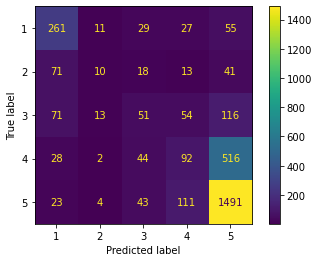

In [95]:
print('SVC')
report(svc)

The best model is logistic Regression as it has more accuracy, but it is able to classify most of the words from class 1 and 5 correctly.

### Finalizing a PipeLine for Deployment on  New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [94]:
from sklearn.pipeline import Pipeline

In [97]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])

In [98]:
pipe.fit(df['reviews'],df['ratings'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

In [102]:
df.iloc[2]

ratings                                                    1
reviews    Camera clarity is very very worst it is like n...
Name: 3, dtype: object

In [101]:
df.iloc[2]['reviews']

'Camera clarity is very very worst it is like normal camera like ..Not much good ..So if you like camera lover not buy it this phone very worst'

In [106]:
df.iloc[5000]

ratings                                  5
reviews    best mobile in this price range
Name: 6070, dtype: object

In [105]:
df.iloc[5000]['reviews']

'best mobile in this price range'

In [107]:
pipe.predict([df.iloc[5000]['reviews']])

array([5], dtype=int64)

## saving the model

In [108]:
import joblib
joblib.dump(pipe,"reviewsRatingPrediction.pkl")

['reviewsRatingPrediction.pkl']